In [498]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [499]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [500]:
X_train = X_train.drop(["PassengerId", "Name", "Embarked"], axis=1)
X_train = X_train.dropna(subset=["Age"])

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

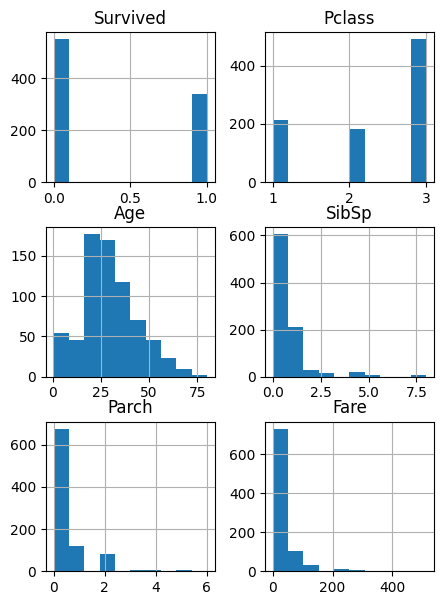

In [183]:
X_train.hist(figsize=(5, 7))

In [184]:
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
from sklearn.impute import SimpleImputer

X_train_num = X_train.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train_num)
X_train_num_imputed = pd.DataFrame(imputer.transform(X_train_num), index=X_train_num.index, columns=imputer.get_feature_names_out())

X_train_num_imputed.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

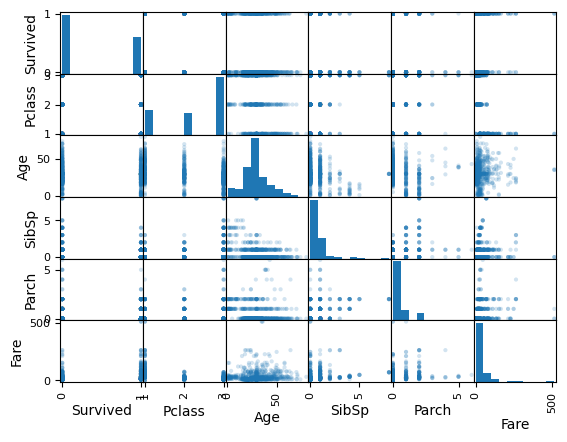

In [186]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_num_imputed, alpha=0.2)

In [187]:
X_train.corr(method="pearson", numeric_only=True)["Survived"].sort_values(key=lambda x: abs(x), ascending=False)

Survived    1.000000
Pclass     -0.335549
Fare        0.255290
Parch       0.083151
Age        -0.082446
SibSp      -0.034040
Name: Survived, dtype: float64

In [188]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse_output=False)
oh_encoder.fit_transform(X_train[["Sex"]])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(889, 2))

In [340]:
X_train = X_train.drop("Embarked", axis=1)

In [594]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipe = make_pipeline(
    SimpleImputer(), StandardScaler()
)

preprocessing = ColumnTransformer(
    [
        ("impute", num_pipe, ["Age", "Fare"]),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["Sex"]),

    ],
    remainder="passthrough",
    n_jobs=-1,
    sparse_threshold=0
)

temp = pd.DataFrame(
    preprocessing.fit_transform(X_train),
    index=X_train.index,
    columns=preprocessing.get_feature_names_out()
).convert_dtypes()

temp["isCabin"] = X_train["Cabin"].notna()
temp["FamilySize"] = X_train["SibSp"] + X_train["Parch"]
temp["Age_23"] = X_train["Age"] - 23
ticket = X_train["Ticket"].values.astype(str)
temp.corr(numeric_only=True)["remainder__Survived"].sort_values(key= lambda x: abs(x), ascending=False)

remainder__Survived    1.000000
cat__Sex_female        0.538826
cat__Sex_male         -0.538826
remainder__Pclass     -0.359653
isCabin                0.324530
impute__Fare           0.268189
remainder__Parch       0.093317
impute__Age           -0.077221
Age_23                -0.077221
FamilySize             0.042787
remainder__SibSp      -0.017358
Name: remainder__Survived, dtype: float64

In [595]:
temp = temp.drop(["remainder__Ticket", "remainder__Cabin"], axis=1)

In [596]:
X_train_ready = temp.drop("remainder__Survived", axis=1)
y_train_ready = temp["remainder__Survived"]
#
# X_train.info()

In [553]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

cls = RandomForestClassifier(n_jobs=-1, max_depth=11, min_samples_leaf=1, min_samples_split=4)
pred = cross_val_predict(cls, X_train_ready, y_train_ready, cv=5, n_jobs=-1, method="predict_proba")[:, 1]
cross_val_score(cls, X_train_ready, y_train_ready, cv=5, n_jobs=-1)

array([0.77622378, 0.82517483, 0.83916084, 0.78321678, 0.87323944])

In [535]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    "n_estimators": [100, 200, 300]
}
grid_search = GridSearchCV(cls, param_grid, cv=3, n_jobs=-1, scoring="accuracy")

grid_search.fit(X_train_ready, y_train_ready)
grid_search.best_params_, grid_search.best_score_

({'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 np.float64(0.8207282913165267))

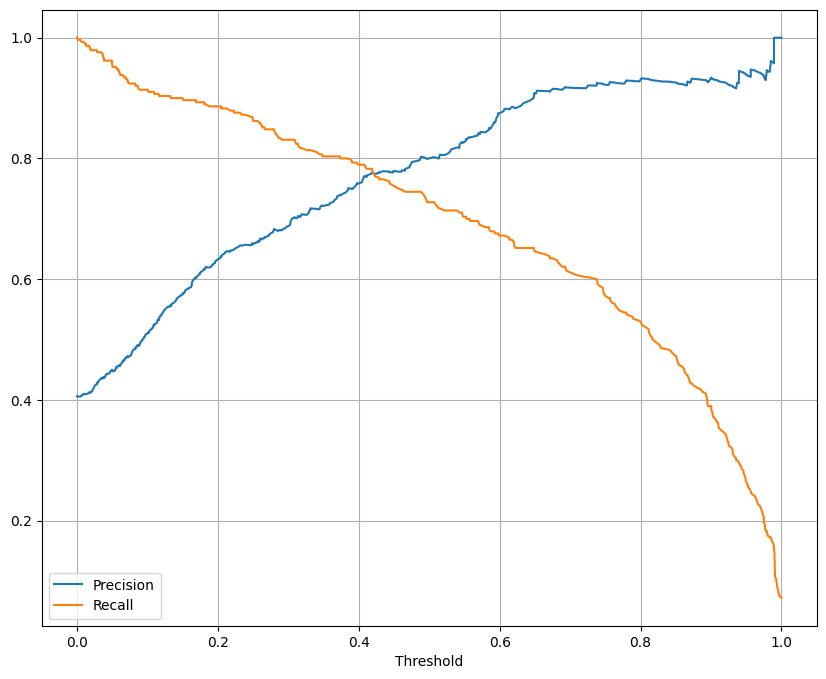

In [597]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_ready, pred)

plt.figure(figsize=(10, 8))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.legend()
plt.grid()
plt.xlabel("Threshold")
plt.show()

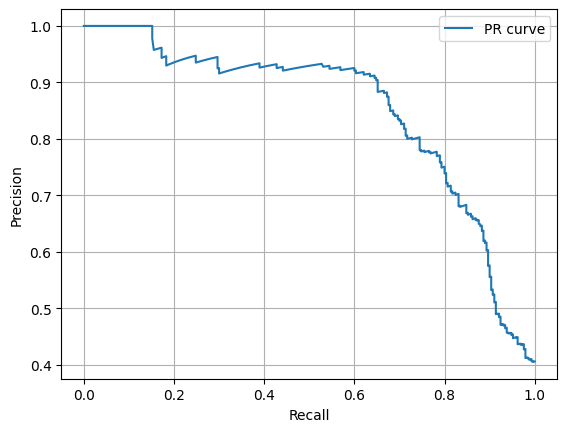

In [598]:
plt.figure()
plt.plot(recalls, precisions, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

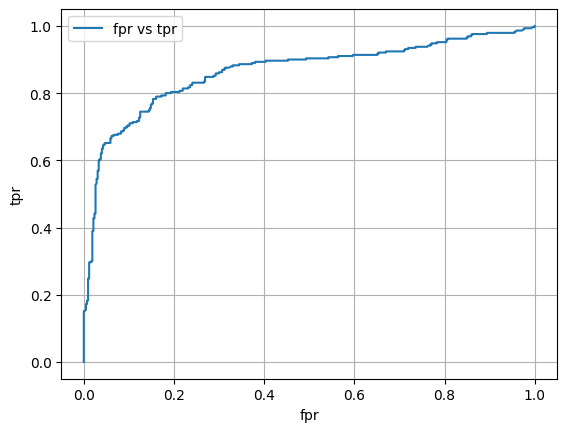

0.8645291151594015


In [599]:
fpr, tpr, thresholds = roc_curve(y_train_ready, pred)

plt.figure()
plt.plot(fpr, tpr, label="fpr vs tpr")

plt.xlabel("fpr")
plt.ylabel("tpr")

plt.legend()
plt.grid()
plt.show()

print(roc_auc_score(y_train_ready, pred))

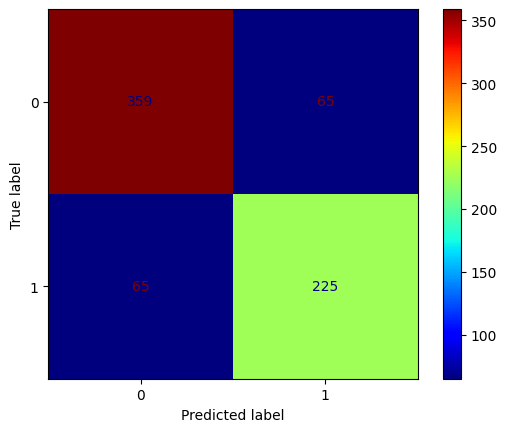

,impute__Age,impute__Fare,cat__Sex_female,cat__Sex_male,remainder__Pclass,remainder__SibSp,remainder__Parch,isCabin,FamilySize,Age_23
0,-0.530377,-0.518978,0,1,3,1,0,False,1,-1.0
1,0.571831,0.691897,1,0,1,1,0,True,1,15.0
2,-0.254825,-0.506214,1,0,3,0,0,False,0,3.0
3,0.365167,0.348049,1,0,1,1,0,True,1,12.0
4,0.365167,-0.50385,0,1,3,0,0,False,0,12.0
...,...,...,...,...,...,...,...,...,...,...
885,0.640719,-0.10532,1,0,3,0,5,False,5,16.0
886,-0.185937,-0.410245,0,1,2,0,0,False,0,4.0
887,-0.737041,-0.088774,1,0,1,0,0,True,0,-4.0
889,-0.254825,-0.088774,0,1,1,0,0,True,0,3.0


In [600]:
from sklearn.metrics import ConfusionMatrixDisplay
y_op = pred >= 0.42

ConfusionMatrixDisplay.from_predictions(y_train_ready, y_op, cmap="jet")
plt.show()